# Optimizers

**Gradient Descent -> Gradient Descent with Momentum -> AdaGrad -> RMSProp -> Adam -> AdamW**

### What is it?

Optimizer is a math function that updates the parameters of the model to minimize the loss function.

Lets start with writing a simple neural net with two linear layers.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x




_generata_data_ 
1. create linear dataset
2. X - input data from -1 to 1
3. y - 3x + noise - the linear relationship the model should learn

_train_model_
Imitate the training process of the model.
1. Define the model
2. Define the loss function
3. Define the optimizer
4. Update the parameters of the model
5. Calculate the loss
6. Backpropagate the loss
7. Update the parameters of the model

In [77]:
def generate_data(n_samples=100):
    X = np.linspace(-1, 1, n_samples)
    y = 3 * X + np.random.normal(0, 0.1, n_samples)
    return X, y

def train_model(model, optimizer_name, X, y, lr=0.01, epochs=200):
    trained_model = model
    criterion = nn.MSELoss()
    
    # Handle different optimizers
    if optimizer_name == "SGD_Momentum":
        optimizer = optim.SGD(trained_model.parameters(), lr=lr, momentum=0.9)
    else:
        optimizer = getattr(optim, optimizer_name)(trained_model.parameters(), lr=lr)


    losses = []
    for _ in range(epochs):
        trained_model.train()
        inputs = torch.from_numpy(X).float().unsqueeze(1)
        targets = torch.from_numpy(y).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = trained_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
    return losses

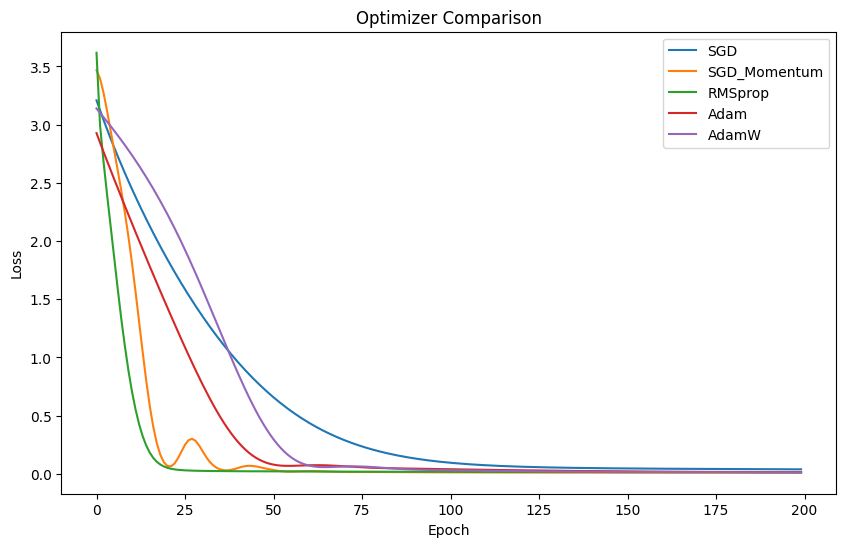

In [101]:
def compare_optimizers(model, data, lr):
    X, y = data
    optimizers = ['SGD', 'SGD_Momentum', 'RMSprop', 'Adam', 'AdamW']
   
    plt.figure(figsize=(10, 6))
    for opt in optimizers:
        trained_model = SimpleNet() if model == 'simple' else ComplexNet()
        losses = train_model(trained_model, opt, X, y, lr)
        plt.plot(losses, label=opt)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Optimizer Comparison')
    plt.legend()
    plt.show()

data = generate_data()
compare_optimizers(model='simple', data=data, lr=0.01)

Lets create a more complex neural network and train it on non linear data.

In [68]:
class ComplexNet(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

generating non linear data

In [69]:
def generate_sine_data(n_samples=100):
    X = np.linspace(-2 * np.pi, 2 * np.pi, n_samples)
    y = np.sin(X) + np.random.normal(0, 0.1, n_samples)
    return X, y

Lets try 3 scenarios:
1. learning rate = 0.001
    - Smaller learning rate leads to more stable training, no loss spikes, but takes more time to converge
2. learning rate = 0.01
    - Learning rate = 0.01 leads to faster convergence, but loss spikes are more frequent
3. learning rate = 0.1
    - Larger learning rate leads to faster convergence, but training is very unstable




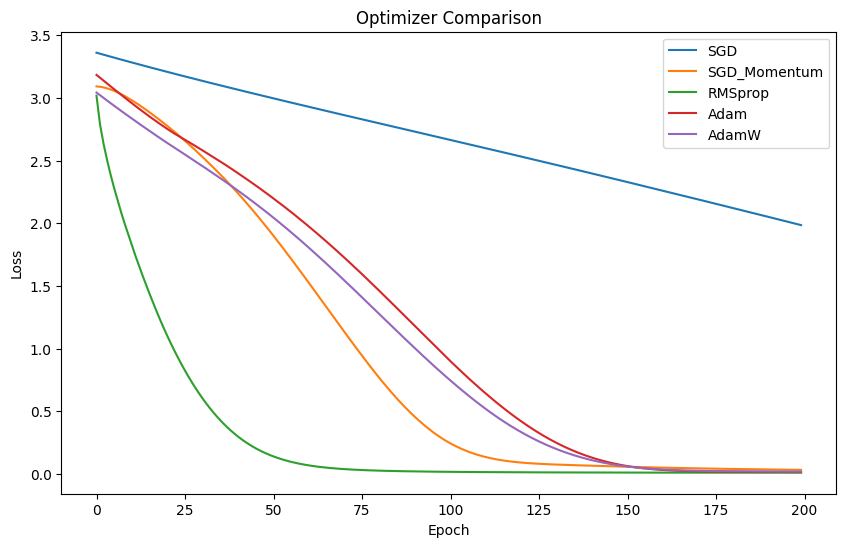

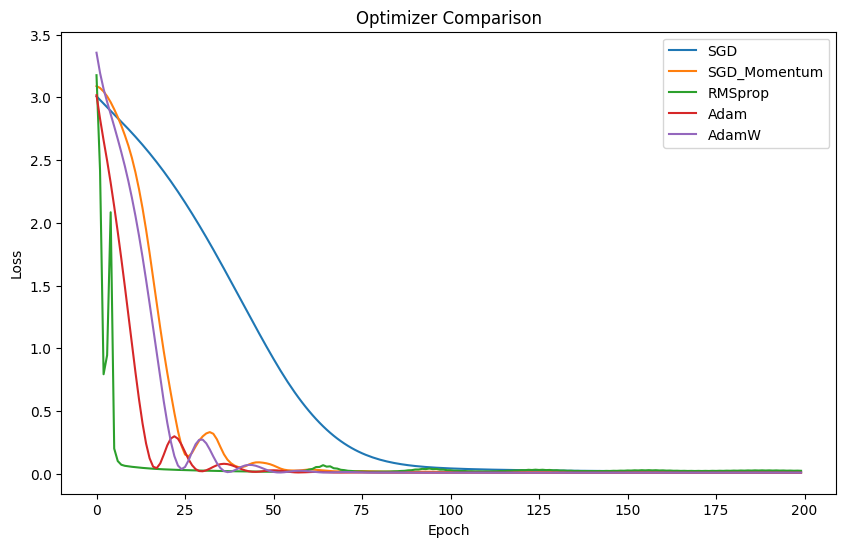

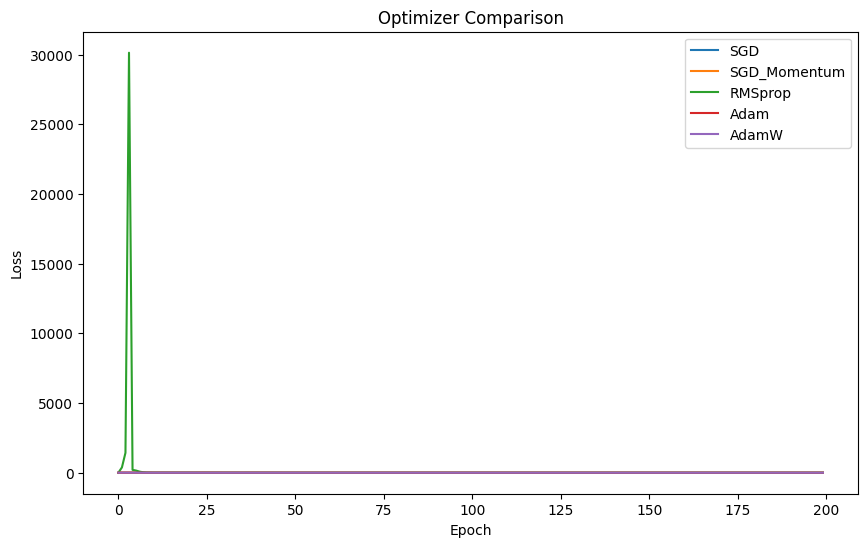

In [102]:
sine_data = generate_sine_data()
compare_optimizers(model='complex', data=data, lr=0.001)
compare_optimizers(model='complex', data=data, lr=0.01)
compare_optimizers(model='complex', data=data, lr=0.1)